In [47]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [48]:
df_train = pd.read_excel('train.xlsx')
df_test  = pd.read_excel('test.xlsx')
df_meal  = pd.read_excel('meal_info.xlsx')
df_sample= pd.read_excel('sample_submission.xlsx')
df_fulfilment = pd.read_excel('fulfilment_center_info.xlsx')

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [50]:
df_test.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [51]:
df_train.head(4)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54


In [52]:
price_diff= df_train['base_price'] - df_train['checkout_price']
df_train['pricediff']=price_diff
df_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,pricediff
0,1379560,1,55,1885,136.83,152.29,0,0,177,15.46
1,1466964,1,55,1993,136.83,135.83,0,0,270,-1.00
2,1346989,1,55,2539,134.86,135.86,0,0,189,1.00
3,1338232,1,55,2139,339.50,437.53,0,0,54,98.03
4,1448490,1,55,2631,243.50,242.50,0,0,40,-1.00
...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,0.00
456544,1062036,145,61,2304,482.09,482.09,0,0,42,0.00
456545,1110849,145,61,2664,237.68,321.07,0,0,501,83.39
456546,1147725,145,61,2569,243.50,313.34,0,0,729,69.84


In [53]:
df_train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders',
       'pricediff'],
      dtype='object')

<AxesSubplot:>

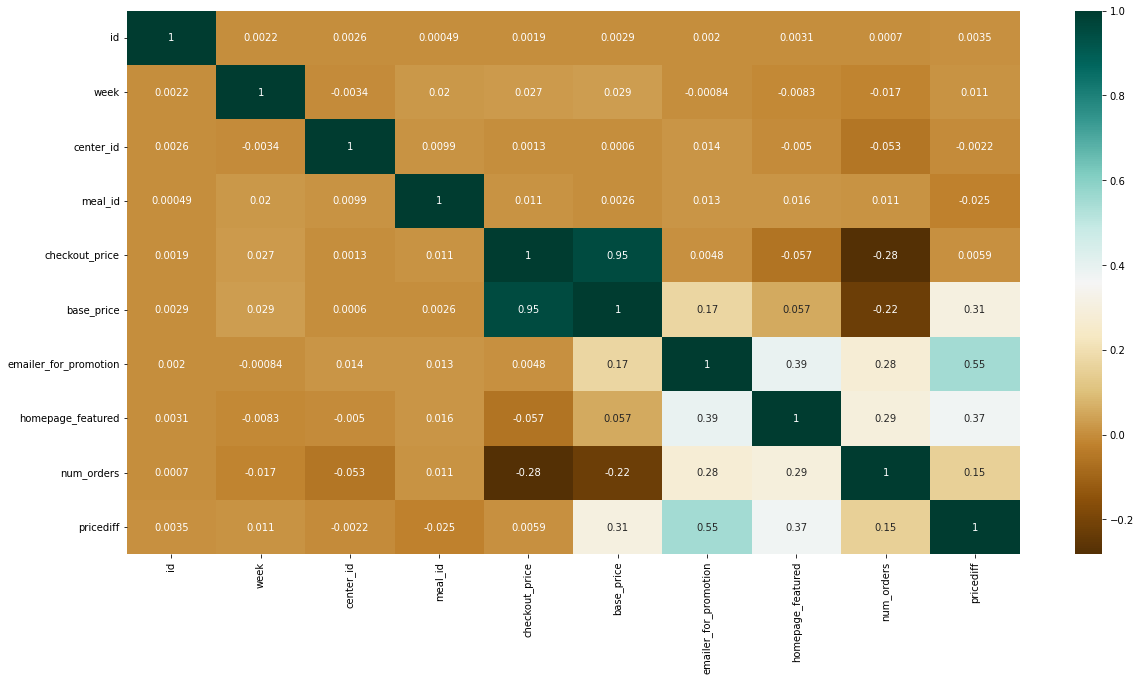

In [54]:
plt.figure(figsize=(20,10))
ass3 = df_train.corr()
sns.heatmap(ass3,cmap="BrBG",annot=True)

# Feature selection

In [76]:
y = df_train["num_orders"]
x = df_train.drop(["num_orders","pricediff"],axis=1)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)



In [82]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 342411 entries, 26338 to 305711
Series name: num_orders
Non-Null Count   Dtype
--------------   -----
342411 non-null  int64
dtypes: int64(1)
memory usage: 5.2 MB


In [81]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 114137 entries, 242838 to 251608
Series name: num_orders
Non-Null Count   Dtype
--------------   -----
114137 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


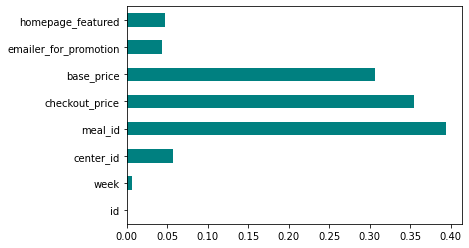

In [57]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances= mutual_info_classif(x,y)
featureimp=pd.Series(importances, df_train.columns[0:len(df_train.columns)-2])
featureimp.plot(kind='barh',color="teal")
plt.show()

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [59]:
bestfeatures = SelectKBest(score_func=chi2,k=7 )
fit = bestfeatures.fit(x, y)
dfscores = np.array(fit.scores_)
dfcolumns = np.array(x.columns)
featureScores = pd.DataFrame({"Feature":dfcolumns,"Score":dfscores})
featureScores['Score'] =featureScores['Score'].apply(lambda x : round(x,2))
featureScores = featureScores.sort_values(['Score'], ascending = False)
featureScores

,Feature,Score
0,id,21768800.38
4,checkout_price,4977956.33
5,base_price,3775454.96
3,meal_id,234642.21
2,center_id,90228.12
7,homepage_featured,41655.83
6,emailer_for_promotion,37056.81
1,week,32750.32


# ML


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [61]:

decission = DecisionTreeRegressor().fit(x_train,y_train)
random    = RandomForestRegressor().fit(x_train,y_train)
linear    = LinearRegression().fit(x_train,y_train)
logic = LogisticRegression().fit(x_train, y_train)
#randomm   = RandomForestClassifier().fit(x_train,y_train)
#test_split = train_test_split().fit(x_train, y_train)
#mean      = mean_squared_log_error().fit(x_trainn,y_trainn)

c:\Users\vanhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
decission_model = decission.predict(x_test)
print(decission_model)

[54. 96. 67. ... 28. 41. 81.]


In [87]:
Logistic_model = logic.predict(x_test)
print(Logistic_model
)

[13 13 13 ... 13 13 13]


In [88]:
Linear_model = linear.predict(x_test)
print(Linear_model)

[495.32400104 386.12262205 259.58361752 ... 184.11385526 -51.47670398
 275.84810535]


In [90]:
random_model = random.predict(x_test)
print(random_model)

[ 72.78 162.11  80.92 ...  27.11  31.68 134.37]


In [69]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [92]:
print("R2 score  :",r2_score(y_test,decission_model))
print("MSE score  :",mean_squared_error(y_test,decission_model))
print("RMSE: ",sqrt(mean_squared_error(y_test,decission_model)))

R2 score  : 0.6233440159041633
MSE score  : 57330.91898332706
RMSE:  239.43875831478715


In [73]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342411 entries, 26338 to 305711
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     342411 non-null  int64  
 1   week                   342411 non-null  int64  
 2   center_id              342411 non-null  int64  
 3   meal_id                342411 non-null  int64  
 4   checkout_price         342411 non-null  float64
 5   base_price             342411 non-null  float64
 6   emailer_for_promotion  342411 non-null  int64  
 7   homepage_featured      342411 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 23.5 MB


In [75]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 114137 entries, 242838 to 251608
Series name: num_orders
Non-Null Count   Dtype
--------------   -----
114137 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


In [93]:
print("R2 score  :",r2_score(y_test,Logistic_model))
print("MSE score  :",mean_squared_error(y_test,Logistic_model))
print("RMSE: ",sqrt(mean_squared_error(y_test,Logistic_model)))

R2 score  : -0.40470599881076685
MSE score  : 213810.71644602538
RMSE:  462.3967089480908


In [94]:
print("R2 score  :",r2_score(y_test,Linear_model))
print("MSE score  :",mean_squared_error(y_test,Linear_model))
print("RMSE: ",sqrt(mean_squared_error(y_test,Linear_model)))

R2 score  : 0.1985250866880106
MSE score  : 121992.73411933197
RMSE:  349.2745826986727


In [95]:
print("R2 score  :",r2_score(y_test,random_model))
print("MSE score  :",mean_squared_error(y_test,random_model))
print("RMSE: ",sqrt(mean_squared_error(y_test,random_model)))

R2 score  : 0.7926240601020175
MSE score  : 31564.753279898716
RMSE:  177.6647215400365
